**Supervised Learning**

/**Labels**/: A label is what we are predicting (y) variable in linear regression.

/**Features**/: A feature is an input variable (x) in linear regression (x₁,x₂,.....xₙ)

/**Examples**/: An example is a particular instance of data, (x->, vector). There are 2 types of examples, labeled and unlabeled examples.

/**Labeled Example**/: uses both features and labels: {features, labels}: (x,y)

/**Unlabeled Example**/: uses features but not labels: {features, ?}: (x,?)

/**Model**/: defines the relationship between features and labels. Model has 2 phases, training and inference.

/**Training**/ means creating or learning the model that is to show the model labeled examples and enable to model to gradually learn the relationships between feature and labels

/**Inference**/ means applying the trained model to unlabeled examples to make useful predictions.

/**Regression Model**/: Predicts continous values

/**Classification Model**/: Predicts discrete values

**Linear Regression**

Depends upon: y = mx+b where in machine learning is it called y = w₁x₁ + b

y is the predicted label, w is the weight, b is the bias and x is the features

Example:        y' = b + w₁x₁ + w₂x₂ + w₃x₃

**Training & Loss**

**Training** a model means learning good values for all the weights and the bias from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called **empirical risk minimization**.

Loss is the penalty for a bad prediction. **Loss** is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is **zero**; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples.

**Squared Loss** (L₂ Loss)

  = the square of the difference between the label and the prediction

  = (observation - prediction(x))2
  
  = (y - y')2

**Mean Square Error (MSE)** is the average squared loss per example over the whole dataset. To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

MSE = 1/N Sigma (x,y)E D (y-prediction(x))^2

where: 

* (x,y) is features and labels
* prediction(x) is a function of weights and bias in combination with a set of features x.
* D is the dataset containing the labeled examples.
* N is the number of examples in D

In gradient descent, a **batch** is the set of examples you use to calculate the gradient in a single training iteration.

**Stochastic gradient descent (SGD)** uses only a single example (a batch size of 1) per iteration to calculate/reduce loss.

**Mini-batch stochastic gradient descent (mini-batch SGD)** is a compromise between full-batch iteration and SGD. A mini-batch is typically between 10 and 1,000 examples, chosen at random. Mini-batch SGD reduces the amount of noise in SGD but is still more efficient than full-batch.



**EXERCISE 1: Simple Linear Regression with Synthetic Data**

First we will import relevant modules

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

**Define functions that build and train a model**

In [ ]:
def build_model(rate):
    # A sequential model contains one or more layers.
    model = tf.keras.Sequential()
    # This line adds one node to one layer in the model
    model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))
    # This line complines the model and trains it to minimise loss
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


def train_model(model, feature, label, epochs,batch_size = None):
    # We give the feature and the label values to the model
    # The model will learn for certain number of epochs

    history = model.fit(x = feature, y = label, batch_size = batch_size, epochs = epochs)

    #This code gathers the trained model's weight and bias
    trained_weight = model.get_weights()[0][0]
    trained_bias = model.get_weights()[1]

    #We can also view the history of epochs run
    epochs = history.epoch

    #Gather the history (a snapshot) of each epoch
    hist = pd.DataFrame(history.history)

    #Gather the model's root mean error
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

**Define plotting functions**

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()

def plot_the_loss(epochs, rmse):
    plt.figure()

    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

**Define the Dataset**

Here we have examples of feature and labels

In [ ]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

**Specify the Hyperparameters**

learning rate, epochs, batch_size

In [ ]:
learning_rate = 0.05
epochs = 500
my_batch_size = 12

#Train your model now
my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)


plot_the_model(trained_weight,trained_bias, my_feature, my_label )
plot_the_loss(epochs, rmse)

**TASK TO DO**

Try to increase the number of epochs: The graph starts converging

Try to increase the learning rate: Red line doesn't align with blue dots and loss curve begins to oscillate

Try to adjust the batch_size: Training Items are reduced. Minimum can be set to 1

**Summary of Hyperparameters Tuning**

* Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.

* If the training loss does not converge, train for more epochs.

* If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.

* If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.

* Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.

* Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.

* For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.


**EXERCISE 2: Linear Regression with a Real Dataset**

After doing this Colab, you'll know how to do the following:

* Read a .csv file into a pandas DataFrame.
* Examine a dataset.
* Experiment with different features in building a model.
* Tune the model's hyperparameters.

**Import the relevant modules**

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

**Load the .csv file into a pandas DataFrame**

You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy

In [ ]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.D
training_df.head()

**Examine the dataset**

* count: number of rows in that column

* mean and std: mean and standard deviation of the values in that column

* min and max: lowest and highest value in column

In [ ]:
training_df.describe()

**Define function and builds and trains the model**

In [ ]:
def build_model2(my_learning_rate):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))

    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = my_learning_rate),
                  loss = "mean_squared_error",
                  metrics = [tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model2(model, df, feature, label, epochs, batch_size):
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

    trained_weight = model.get_weights()[0][0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)

    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

**Define Plotting Function**

* a scatter plot of the feature vs. the label, and a line showing the output of the trained model
* a loss curve

In [ ]:
def plot_the_model2(trained_weight, trained_bias, feature, label):
    plt.xlabel(feature)
    plt.ylabel(label)

    #create a scatterplot from 200 random points on the dataset
    random_example = training_df.sample(n=200)
    plt.scatter(random_example[feature], random_example[label])

    x0 = 0
    y0 = trained_bias
    x1 = random_example[feature].max()
    y1 = trained_bias + (trained_weight*x1)
    plt.plot([x0,x1],[y0,y1], c='r')
    plt.show()

def plot_the_loss2(epoch, rmse):
    plt.figure()

    plt.xlabel("epoch")
    plt.ylabel("rmse")

    plt.plot(epoch, rmse, label = "Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show() 


**Call the model function**

For now we will use the total_rooms as the most reliant feature

In [ ]:
learning_rate = 0.01
epochs = 30
batch_size = 30

my_feature = "total_rooms" 
my_label="median_house_value"

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss(epochs, rmse)

**Now you can use the model to make predictions**

You should make predictions on examples that are not used in training.

In [ ]:
def prediction(n, feature, label):

    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")

    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))


prediction(25, my_feature, my_label)

**Task: Judge the predictive power of the model**

Look at the preceding table. How close is the predicted value to the label value? In other words, does your model accurately predict house values?

The total_rooms feature had only a little predictive power. Would a different feature have greater predictive power? Try using population as the feature instead of total_rooms.

Note: When you change features, you might also need to change the hyperparameters.

In [ ]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss(epochs, rmse)

prediction(10, my_feature, my_label)

**Task to do**

You have determined that total_rooms and population were not useful features. That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the ratio of total_rooms to population might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

* Create a synthetic feature that's a ratio of total_rooms to population. (If you are new to pandas DataFrames, please study the Pandas DataFrame Ultraquick Tutorial.)

* Tune the three hyperparameters.

* Determine whether this synthetic feature produces a lower loss value than any of the single features you tried earlier in this exercise.

In [ ]:
training_df["rooms_per_person"] = training_df["total_rooms"]/training_df["population"]

my_feature = "rooms_per_person"

learning_rate = 0.05
epochs = 25
batch_size = 5

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss(epochs, rmse)
prediction(15, my_feature, my_label)

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in previous tasks. However, the model still isn't creating great predictions.

**Task to do**

Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model. Let's rely on statistics instead.

A /**correlation matrix**/ indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
0.0: no correlation; the two columns are not linearly related.
In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [ ]:
# Generate a correlation matrix.
training_df.corr()

**Generalization: Peril of Overfitting**

An overfit model gets a low loss during training but does a poor job predicting new data.

William of Ockham, a 14th century friar and philosopher, loved simplicity. He believed that scientists should prefer simpler formulas or theories over more complex ones. To put Ockham's razor in machine learning terms:

*The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample.*

In modern times, we've formalized Ockham's razor into the fields of statistical learning theory and computational learning theory. These fields have developed generalization bounds--a statistical description of a model's ability to generalize to new data based on factors such as:

* the complexity of the model
* the model's performance on training data

One way is to divide your data set into two subsets:

* training set—a subset to train a model.
* test set—a subset to test the model.


**Never train on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. For example, high accuracy might indicate that test data has leaked into the training set.

Use the validation set to evaluate results from the training set. Then, use the test set to double-check your evaluation after the model has "passed" the validation set. The following figure shows this new workflow:

![Screenshot 2024-07-12 at 9.58.36 PM.png](<attachment:Screenshot 2024-07-12 at 9.58.36 PM.png>)
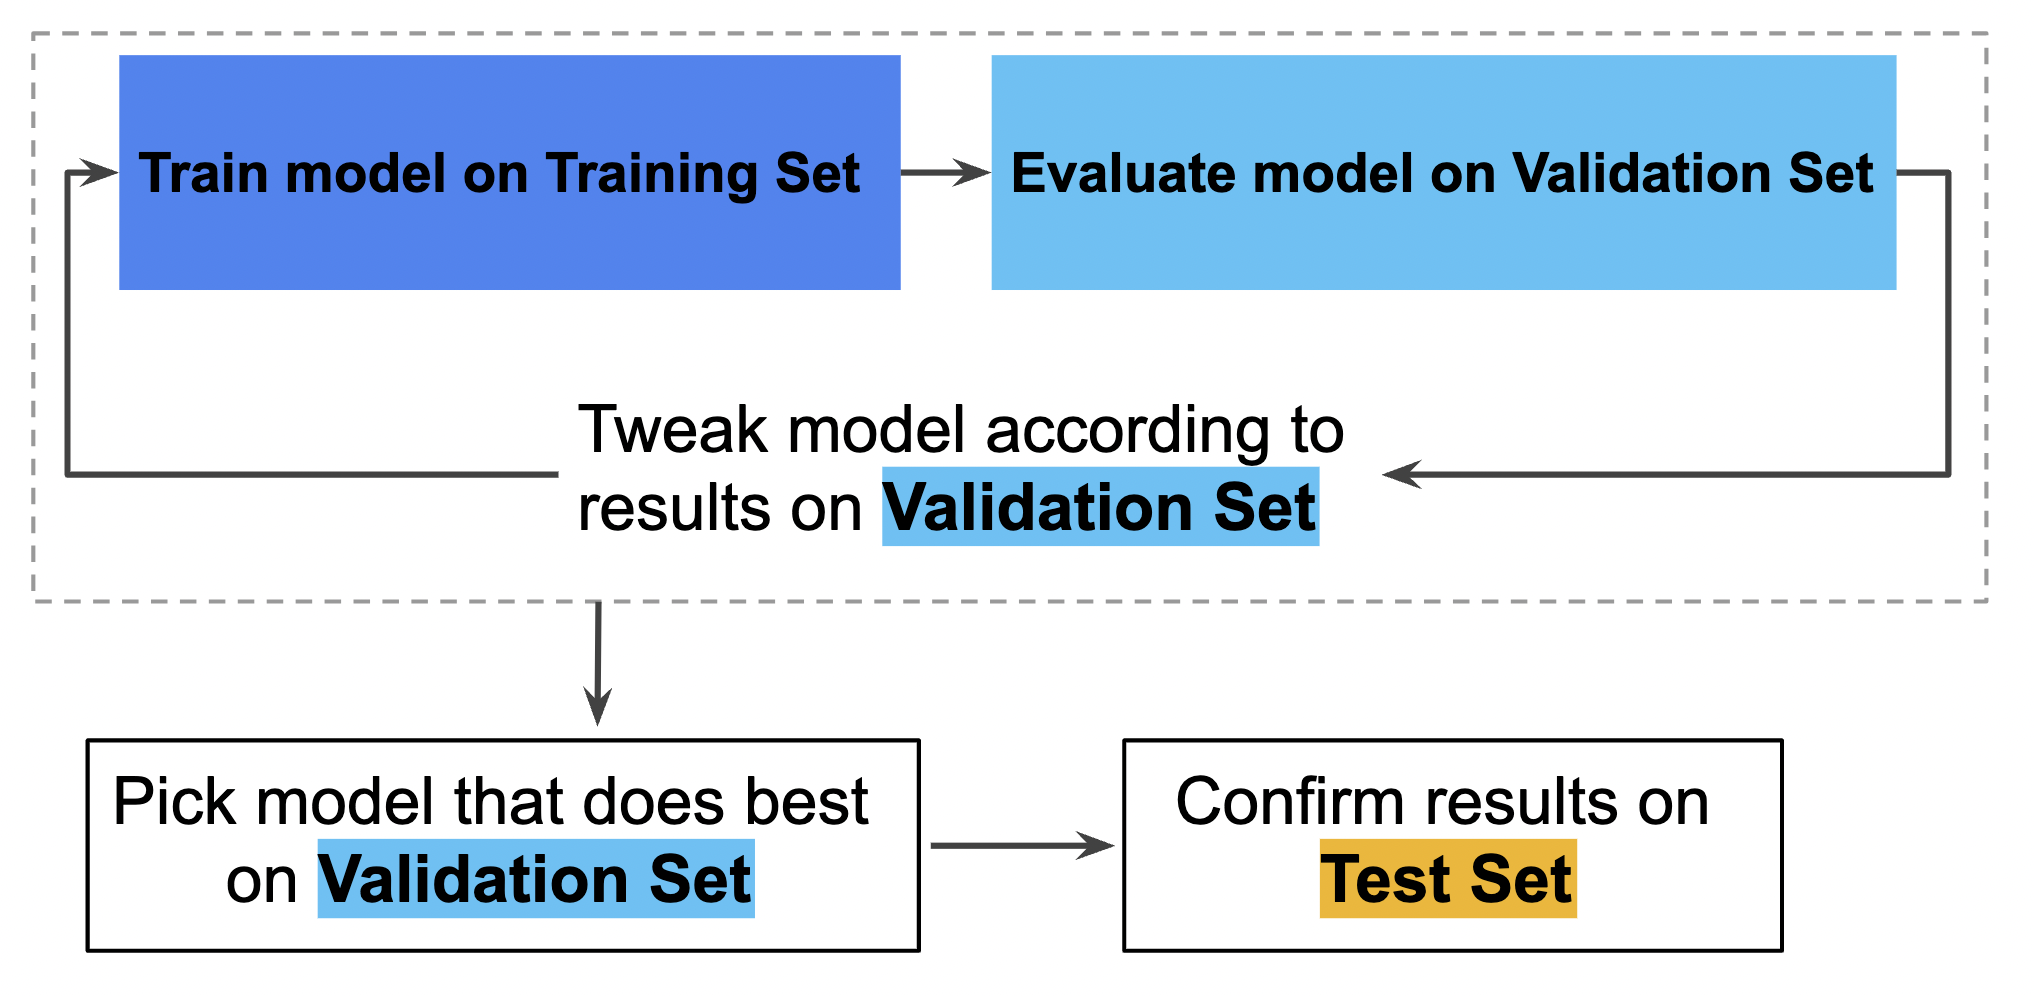

**EXERCISE 3: Validation Sets and Test Sets**

After doing this Colab, you'll know how to do the following:

* Split a training set into a smaller training set and a validation set.

* Analyze deltas between training set and validation set results.

* Test the trained model with a test set to determine whether your trained model is overfitting.

* Detect and fix a common training problem.

**Import relevant modules**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

**Load the datasets from the internet**

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

**Scale the label values**

The following code cell scales the median_house_value.

In [ ]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

**Build and Train the Model Function**

In [ ]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

**Define the plotting curve**

In [ ]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()
    
    # We're not going to plot the first epoch, since the loss on the first epoch
    # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)
    
    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()

**Task: Experiment with the Validation Set**

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

**Feature engineering** means transforming raw data into a feature vector. Expect to spend significant time doing feature engineering.

Many machine learning models must represent the features as real-numbered vectors since the feature values must be multiplied by the model weights.

Since models cannot multiply strings by the learned weights, we use feature engineering to convert strings to numeric values.

We can accomplish this by defining a mapping from the feature values, which we'll refer to as the vocabulary of possible values, to integers. Since not every street in the world will appear in our dataset, we can group all other streets into a catch-all "other" category, known as an **OOV (out-of-vocabulary) bucket.**

However, if we incorporate these index numbers directly into our model, it will impose some constraints that might be problematic:

* We'll be learning a single weight that applies to all streets. For example, if we learn a weight of 6 for street_name, then we will multiply it by 0 for Charleston Road, by 1 for North Shoreline Boulevard, 2 for Shorebird Way and so on. Consider a model that predicts house prices using street_name as a feature. It is unlikely that there is a linear adjustment of price based on the street name, and furthermore this would assume you have ordered the streets based on their average house price. Our model needs the flexibility of learning different weights for each street that will be added to the price estimated using the other features.

* We aren't accounting for cases where street_name may take multiple values. For example, many houses are located at the corner of two streets, and there's no way to encode that information in the street_name value if it contains a single index.

To remove both these constraints, we can instead create a binary vector for each categorical feature in our model that represents values as follows:

* For values that apply to the example, set corresponding vector elements to 1.

* Set all other elements to 0.

The length of this vector is equal to the number of elements in the vocabulary. This representation is called a one-hot encoding when a single value is 1, and a multi-hot encoding when multiple values are 1.

**EXERCISE 3: Feature Crosses: Programming Exercise**

After doing this Colab, you'll know how to:

* Use TensorFlow preprocessing layers to represent features in different ways.
* Represent features as bins.
* Cross bins to create a feature cross.

In [ ]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

**Load, scale, and shuffle the examples**

In [ ]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

**Represent latitude and longitude as floating-point values**

This exercise trains on two features using Input layers.

A neighborhood's location is typically the most important feature in determining a house's value. The California Housing dataset provides two features, latitude and longitude that identify each neighborhood's location.

The following code cell defines two tf.keras.Input layers, one to represent latitude and another one to represent longitude, both as floating-point values.

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented.

In [ ]:
# Keras Input tensors of float values.
inputs = {
    'latitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='latitude'),
    'longitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='longitude')
}

**Define functions that create and train a model, and a plotting function**

In [ ]:
def create_model(my_inputs, my_outputs, my_learning_rate):

  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()

**Train the model with floating-point representations**

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# The two Input layers are concatenated so they can be passed as a single
# tensor to a Dense layer.
preprocessing_layer = tf.keras.layers.Concatenate()(list(inputs.values()))
dense_output = layers.Dense(units=1, name='dense_layer')(preprocessing_layer)

outputs = {
  'dense_output': dense_output
}

# Create and compile the model's topography.
my_model = create_model(inputs, outputs, learning_rate)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_model.png", show_shapes=True)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

**Represent latitude and longitude in buckets**

In [ ]:
resolution_in_degrees = 1.0

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))
print("latitude boundaries: " + str(latitude_boundaries))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Number of categories is the length of latitude_boundaries plus one.
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

print("longitude boundaries: " + str(longitude_boundaries))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Number of categories is the length of longitude_boundaries plus one.
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(longitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

# Concatenate latitude and longitude into a single tensor as input for the Dense layer.
concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(concatenate_layer)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

**Train the model with bucket representations**

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model.
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

**Represent location as a feature cross**

In [ ]:
resolution_in_degrees = 1.0

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cross the latitude and longitude features into a single one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(feature_cross)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

In [ ]:
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer:
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)